# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#query_url = url + api_key + q= 
#https://websity {url}{api}
#f strings { }

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=a34c301a68e21f0b8d5da503eab30b0d&units=imperial&q=


## Generate Cities List

In [48]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

620

In [49]:
response

{'coord': {'lon': 69.77, 'lat': 21.93},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 76.71,
  'feels_like': 81.99,
  'temp_min': 76.71,
  'temp_max': 76.71,
  'pressure': 1007,
  'humidity': 91,
  'sea_level': 1007,
  'grnd_level': 1000},
 'wind': {'speed': 7.87, 'deg': 297},
 'clouds': {'all': 0},
 'dt': 1588373234,
 'sys': {'country': 'IN', 'sunrise': 1588380510, 'sunset': 1588427227},
 'timezone': 19800,
 'id': 1276147,
 'name': 'Bhānvad',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [52]:
#cities = ["Paris", "London", "Oslo", "Beijing"]

# set up lists to hold reponse info
lat = []
long = []
temp = []
hum = []
cld = []
wind = []
country = []
# empty list 
final_cities = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    print(f"Processed {city}")
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat']) 
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        hum.append(response['main']['humidity'])
        cld.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        final_cities.append(city)
    except KeyError:
        print("City Not Found")

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")
print(f"The humidity information received is: {hum}")
print(f"The cloudiness percentage is: {cld}")
print(f"The wind speed received is: {wind}")
        

Processed umm lajj
Processed vaini
Processed victoria
Processed oranjemund
Processed punta arenas
Processed fare
Processed georgetown
Processed pueblo
Processed rikitea
Processed marsabit
Processed kawalu
Processed hofn
Processed three hills
Processed cape town
Processed severo-kurilsk
Processed new norfolk
Processed mozarlandia
Processed san cristobal
Processed bredasdorp
Processed kloulklubed
Processed sinnamary
Processed bethel
Processed uyemskiy
Processed ostrovnoy
Processed cockburn town
Processed porto velho
Processed marawi
Processed ribeira grande
Processed taolanaro
City Not Found
Processed hermanus
Processed hamilton
Processed albany
Processed hilo
Processed namatanai
Processed jamestown
Processed port alfred
Processed nhulunbuy
Processed kahului
Processed puerto ayora
Processed sola
Processed san quintin
Processed basco
Processed pafos
Processed barentsburg
City Not Found
Processed ushuaia
Processed kenai
Processed nizhneyansk
City Not Found
Processed chokurdakh
Processed la

Processed tazmalt
Processed ouesso
Processed najran
Processed winnemucca
Processed swan hill
Processed brightwater
Processed ngukurr
City Not Found
Processed gbarnga
Processed tshikapa
Processed anadyr
Processed suicheng
Processed bisira
Processed hanting
Processed mindelo
Processed huarmey
Processed tir pol
City Not Found
Processed mareeba
Processed sawakin
Processed nadym
Processed san patricio
Processed kajiado
Processed kulu
Processed batemans bay
Processed puerto penasco
Processed salalah
Processed grand river south east
City Not Found
Processed saint-georges
Processed caldwell
Processed coahuayana
Processed qui nhon
Processed balimo
City Not Found
Processed ningan
City Not Found
Processed gatak
Processed bredy
Processed dehloran
Processed tual
Processed praia da vitoria
Processed anito
Processed faya
Processed shintomi
Processed treinta y tres
Processed jiazi
Processed humaita
Processed amderma
City Not Found
Processed hambantota
Processed black river
Processed grindavik
Processe

The wind speed received is: [6.33, 10.29, 4, 3.62, 17, 10.42, 3.36, 14.99, 17.78, 15.79, 1.63, 4.85, 3.29, 1.12, 8.41, 5.01, 4.56, 2.48, 3.36, 8.05, 11.03, 6.24, 3.4, 5.75, 13.4, 2.24, 7, 29.37, 2.13, 6.93, 13, 9.17, 2.82, 9.17, 3, 17.22, 28.86, 12.75, 8.05, 11.52, 16.26, 1.12, 14.99, 11.41, 6.44, 7, 11.54, 15.61, 26.4, 4.7, 17.49, 3, 4.7, 2.3, 20.89, 10.42, 3.36, 13.2, 12.75, 9.17, 8.05, 1.9, 2.93, 11.18, 2.57, 18.01, 12.59, 8.05, 7.16, 4.32, 1.01, 12.88, 4.45, 10.67, 16.11, 17.22, 4.7, 4.7, 25.01, 9.17, 5.14, 6.6, 19.89, 1.99, 5.21, 17.22, 3.4, 8.79, 10.29, 15.88, 9.51, 8.05, 11.95, 9.75, 10.29, 3.11, 11.39, 9.17, 8.05, 9.13, 15.99, 0.96, 12.75, 8.01, 11.41, 8.05, 2.3, 6.71, 3.78, 10.29, 14.99, 15.32, 3.49, 2.08, 6.44, 10.29, 30.02, 12.75, 3.58, 4.09, 4.36, 9.17, 3.36, 2.04, 6.49, 12.75, 10.33, 18.34, 7, 2.68, 21.92, 3.24, 0.2, 4.43, 12.08, 9.17, 10.6, 6.93, 13.27, 14.99, 20, 4.7, 4.7, 8.05, 9.98, 9.53, 1.45, 4.7, 8.86, 20.8, 8.21, 1.63, 7.2, 3.36, 8.43, 4.07, 16.11, 15.39, 5.82, 1.5

In [53]:
len(final_cities)

568

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [54]:
weather_dict = {
    "city": final_cities,
    "lat": lat,
    "long": long,
    "temp": temp,
    "hum": hum,
    "cld": cld,
    "wind": wind,
    "country": country}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city,lat,long,temp,hum,cld,wind,country
0,umm lajj,25.02,37.27,75.00,48,0,6.33,SA
1,vaini,-21.20,-175.20,80.60,74,20,10.29,TO
2,victoria,22.29,114.16,77.65,74,68,4.00,HK
3,oranjemund,-28.55,16.43,61.95,62,27,3.62,NA
4,punta arenas,-53.15,-70.92,48.00,76,100,17.00,CL


In [55]:
weather_data.to_csv(output_data_file, index=False)

In [56]:
weather_data.describe()

,lat,long,temp,hum,cld,wind
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,19.706620,17.253327,61.613785,69.512324,50.764085,8.258046
std,33.595544,92.906255,18.575001,21.466676,36.899988,5.691979
min,-54.800000,-175.200000,12.200000,1.000000,0.000000,0.200000
25%,-7.595000,-67.437500,50.220000,57.000000,14.750000,3.420000
50%,22.905000,19.635000,63.885000,75.000000,51.000000,7.150000
75%,47.717500,104.120000,77.040000,86.000000,90.000000,11.410000
max,78.220000,179.320000,95.000000,100.000000,100.000000,30.020000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [57]:
mask = weather_data.hum > 100
weather_data_sub = weather_data.loc[mask].reset_index(drop=True)

weather_data_sub.head()

,city,lat,long,temp,hum,cld,wind,country


In [58]:
#  Get the indices of cities that have humidity over 100%.


In [59]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [60]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [61]:
weather_data.head()

,city,lat,long,temp,hum,cld,wind,country
0,umm lajj,25.02,37.27,75.00,48,0,6.33,SA
1,vaini,-21.20,-175.20,80.60,74,20,10.29,TO
2,victoria,22.29,114.16,77.65,74,68,4.00,HK
3,oranjemund,-28.55,16.43,61.95,62,27,3.62,NA
4,punta arenas,-53.15,-70.92,48.00,76,100,17.00,CL


## Latitude vs. Temperature Plot

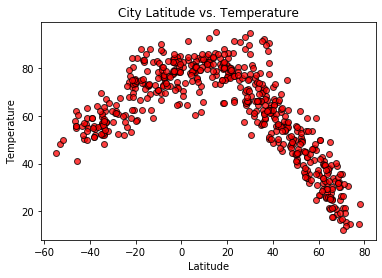

In [62]:
plt.scatter(weather_data["lat"], weather_data["temp"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Humidity Plot

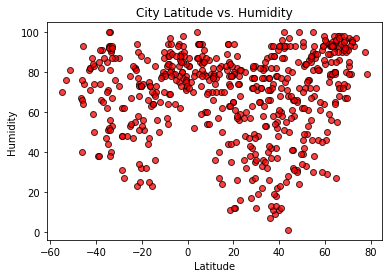

In [63]:
# copy paste change variables and labels
plt.scatter(weather_data["lat"], weather_data["hum"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

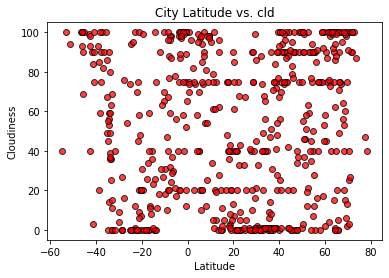

In [64]:
plt.scatter(weather_data["lat"], weather_data["cld"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.title('City Latitude vs. cld')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

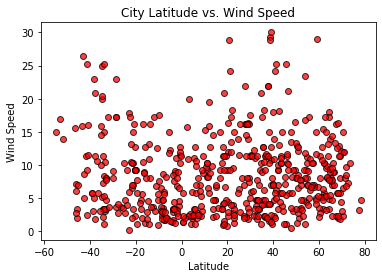

In [65]:
plt.scatter(weather_data["lat"], weather_data["wind"], marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [66]:
# OPTIONAL: Create a function to create Linear Regression plots

In [67]:
# start coding 

In [68]:
north_mask = weather_data.lat >= 0
df_north = weather_data.loc[north_mask].reset_index(drop=True)
df_north.head()

,city,lat,long,temp,hum,cld,wind,country
0,umm lajj,25.02,37.27,75.00,48,0,6.33,SA
1,victoria,22.29,114.16,77.65,74,68,4.00,HK
2,georgetown,5.41,100.34,78.40,94,20,3.36,MY
3,pueblo,38.25,-104.61,90.52,9,1,14.99,US
4,marsabit,2.33,37.99,64.67,70,82,15.79,KE


In [69]:
south_mask = weather_data.lat < 0
df_south = weather_data.loc[south_mask].reset_index(drop=True)
df_south.head()

,city,lat,long,temp,hum,cld,wind,country
0,vaini,-21.20,-175.20,80.60,74,20,10.29,TO
1,oranjemund,-28.55,16.43,61.95,62,27,3.62,NA
2,punta arenas,-53.15,-70.92,48.00,76,100,17.00,CL
3,fare,-16.70,-151.02,83.32,75,0,10.42,PF
4,rikitea,-23.12,-134.97,79.30,82,100,17.78,PF


In [70]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7962938522900714
The p-value is: 9.715424155988947e-135


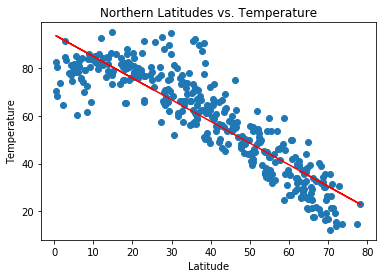

y = -0.91x + 94.0


In [71]:
x_values = df_north["lat"]
y_values = df_north["temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Northern Latitudes vs. Temperature")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()
print(line_eq)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.659458173128683
The p-value is: 5.730926029593175e-44


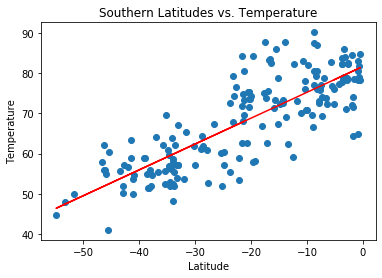

y = 0.64x + 81.67


In [72]:
x_values = df_south["lat"]
y_values = df_south["temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("Southern Latitudes vs. Temperature")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()
print(line_eq)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.028400511716584222
The p-value is: 0.0008872088851105308


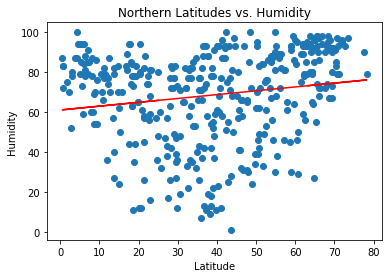

y = 0.19x + 61.06


In [73]:
x_values = df_north["lat"]
y_values = df_north["hum"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Northern Latitudes vs. Humidity")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()
print(line_eq)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0278944491637774
The p-value is: 0.024227565574868874


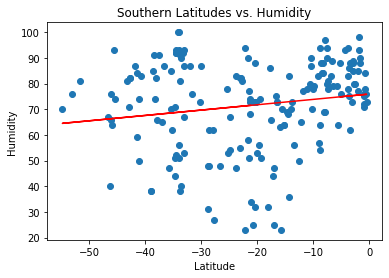

y = 0.21x + 75.93


In [74]:
x_values = df_south["lat"]
y_values = df_south["hum"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Southern Latitudes vs. Humidity")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()
print(line_eq)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.03361258130040919
The p-value is: 0.0002933937870851185


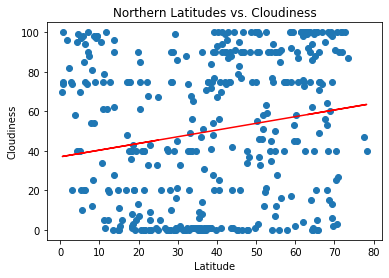

y = 0.34x + 36.97


In [75]:
x_values = df_north["lat"]
y_values = df_north["cld"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Northern Latitudes vs. Cloudiness")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()
print(line_eq)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0016392326570544187
The p-value is: 0.5873607023881198


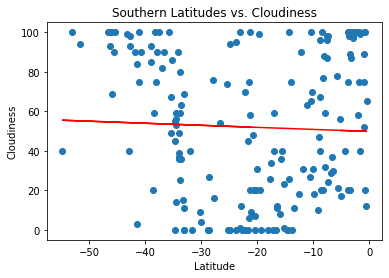

y = -0.1x + 49.81


In [76]:
x_values = df_south["lat"]
y_values = df_south["cld"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Southern Latitudes vs. Cloudiness")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()
print(line_eq)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00547523896998428
The p-value is: 0.1467678102421523


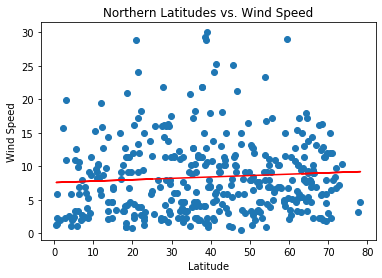

y = 0.02x + 7.6


In [77]:
x_values = df_north["lat"]
y_values = df_north["wind"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Northern Latitudes vs. Wind Speed")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()
print(line_eq)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08905899506603425
The p-value is: 4.278466450660214e-05


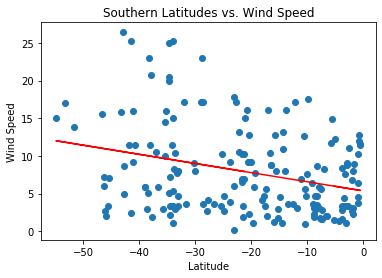

y = -0.12x + 5.37


In [78]:
x_values = df_south["lat"]
y_values = df_south["wind"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Southern Latitudes vs. Wind Speed")
print(f"The r-squared is: {rvalue**2}")
print(f"The p-value is: {pvalue}")
plt.show()
print(line_eq)

## Three Observable Trends

Southern Hemisphere Cloudiness (.587) and Northern Hemisphere Wind Speed (.147) vs. Latitude P-Values were the only two of the eight linear regressions higher than 0.05 meaning that the model does not fit the data well. 

Northern Hemisphere Temperatures (.796) and Southern Hemisphere Temperatures (.659) vs. Latitude R-Squared means that my model explains 79.6% and 65.9% of the variation within the data respectively. 

The previous statement is very evident in the Latitude vs Temperature Scatter Plot where a parabolic curve takes shape. This makes sense because it tends to be warmer near the equator and cooler near the north or south poles in the higher (absolute value) latitudes. 